In [1]:
# Import Libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
dataset = pd.read_csv('/home/jaco/Documentos/Projetos/DataMiningProject/Classification/breast-cancer-wisconsin.csv')

In [3]:
# Showing the 5 first rows
dataset.head(5)

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Showing the size of dataset
dataset.shape

(699, 11)

In [5]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
# Showing the columns
dataset.columns

Index(['ID', 'Clump_Thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class '],
      dtype='object')

In [7]:
# Showing the class distribution
print('No Cancer', round(dataset['Class '].value_counts()[2]/len(dataset) * 100,2), '% of the dataset')
print('Cancer', round(dataset['Class '].value_counts()[4]/len(dataset) * 100,2), '% of the dataset')

No Cancer 65.52 % of the dataset
Cancer 34.48 % of the dataset


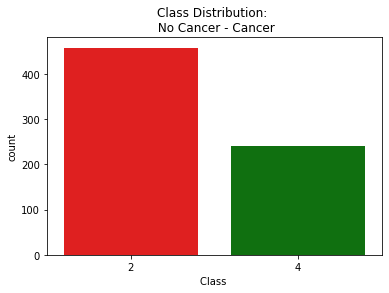

In [8]:
# Showing the class distribution
Colors = ['#FF0000','#008000']
imbalance_class = sns.countplot('Class ',data=dataset,palette=Colors)
fig = imbalance_class.get_figure()
fig.savefig('/home/jaco/Documentos/Projetos/DataMiningProject/Classification/imbalance_class.png')
plt.title('Class Distribution: \n No Cancer - Cancer', fontsize=12)
plt.show()

In [9]:
# Assingning just the values from dataset
dataset = dataset.values
X = dataset[:,:-1]
Y = dataset[:,-1]

In [10]:
Y = Y.reshape(-1,1)
Y = np.where(Y==2,0,Y)
Y = np.where(Y==4,1,Y)
Y = Y.astype('int')

In [11]:
# Replace missing values for 1
X = np.where(X=='?',1,X)
X = X.astype('int')

In [12]:
# Balacing the dataset
sm = SMOTE('minority')
X_res, Y_res = sm.fit_resample(X, Y)

In [13]:
from collections import Counter

In [14]:
repeticoes = Counter(Y_res)
print(repeticoes)

Counter({0: 458, 1: 458})


In [74]:
# Separating the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res,test_size=0.3,random_state=2)

In [75]:
# saving the files
np.save('~/Classification/x_train',X_train)
np.save('~/Classification/x_test',X_test)
np.save('~/Classification/Y_train',Y_train)
np.save('~/Classification/Y_test',Y_test)